<a href="https://colab.research.google.com/github/nambelaas/DataMining/blob/main/K_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [24]:
print(x)

[[    10 122391]
 [    10 121872]
 [     9 112635]
 [     9 116969]
 [     9 109431]
 [     8 113812]
 [     9 105582]
 [     8 101302]
 [     7  98273]
 [     7  91738]
 [     6  93940]
 [     5  66029]
 [     3  54445]
 [     4  55794]
 [     3  56642]
 [     5  67938]
 [     6  81363]
 [     5  83088]
 [     4  56957]
 [     2  43525]
 [     3  64445]
 [     3  60150]
 [     4  57081]
 [     2  39891]
 [     4  57189]
 [     4  61111]
 [     4  63218]
 [     1  46205]
 [     1  37731]
 [     1  39343]]


In [25]:
print(y)

[1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [27]:
print(x_train)

[[     5  83088]
 [     4  57081]
 [     8 113812]
 [     6  81363]
 [     7  98273]
 [     3  56642]
 [     2  39891]
 [     3  64445]
 [    10 121872]
 [     1  39343]
 [     9 105582]
 [     9 109431]
 [     4  56957]
 [     2  43525]
 [     7  91738]
 [     8 101302]
 [     4  61111]
 [     9 116969]
 [    10 122391]
 [     3  60150]
 [     5  67938]
 [     3  54445]]


In [28]:
print(x_test)

[[     9 112635]
 [     1  37731]
 [     4  55794]
 [     6  93940]
 [     4  63218]
 [     4  57189]
 [     1  46205]
 [     5  66029]]


In [29]:
print(y_train)

[1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0]


In [30]:
print(y_test)

[0 0 1 1 1 1 1 1]


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
print(x_train)

[[-0.19538688  0.13377274]
 [-0.55359617 -0.81599097]
 [ 0.87924097  1.25579913]
 [ 0.1628224   0.07077653]
 [ 0.52103169  0.68832197]
 [-0.91180545 -0.83202305]
 [-1.27001474 -1.44376189]
 [-0.91180545 -0.54706107]
 [ 1.59565954  1.55014663]
 [-1.62822402 -1.46377459]
 [ 1.23745026  0.9552433 ]
 [ 1.23745026  1.09580702]
 [-0.55359617 -0.82051939]
 [-1.27001474 -1.31104987]
 [ 0.52103169  0.44966677]
 [ 0.87924097  0.79893967]
 [-0.55359617 -0.66881722]
 [ 1.23745026  1.37109132]
 [ 1.59565954  1.56910027]
 [-0.91180545 -0.7039125 ]
 [-0.19538688 -0.41949831]
 [-0.91180545 -0.91225648]]


In [33]:
print(x_test)

[[ 1.23745026  1.21281563]
 [-1.62822402 -1.5226441 ]
 [-0.55359617 -0.86299162]
 [ 0.1628224   0.5300828 ]
 [-0.55359617 -0.59187055]
 [-0.55359617 -0.81204686]
 [-1.62822402 -1.2131775 ]
 [-0.19538688 -0.48921412]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred = classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1]
 [3 3]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


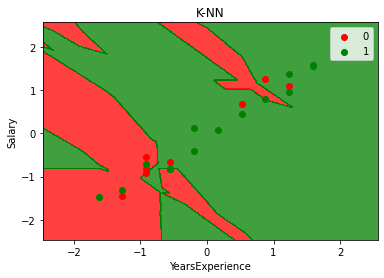

In [39]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('K-NN')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


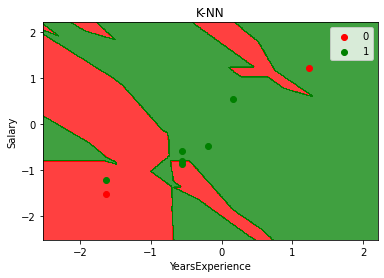

In [40]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('K-NN')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()